In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
df_data = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
df_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


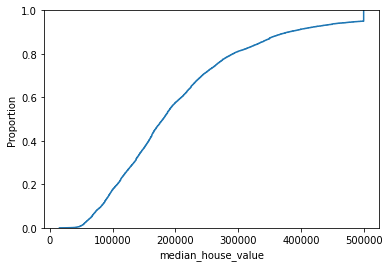

In [ ]:
sns.ecdfplot(data=df_data, x='median_house_value')

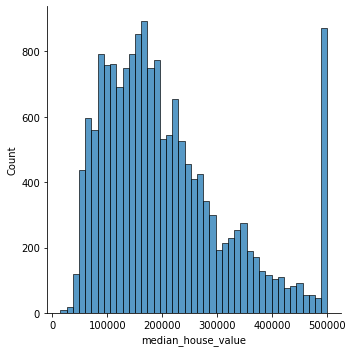

In [ ]:
sns.displot(data=df_data, x='median_house_value')

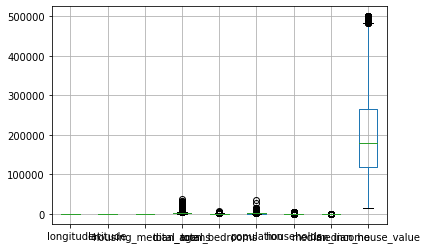

In [ ]:
df_data.boxplot()
# 有極端值欸

In [ ]:
df_data['new median_house_value']= np.log(df_data['median_house_value'])

In [ ]:
df_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,11.110954
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,11.291031
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,11.358608
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,11.203679
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,11.089805
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,11.620883
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,11.277203
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,11.548293
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,11.359774


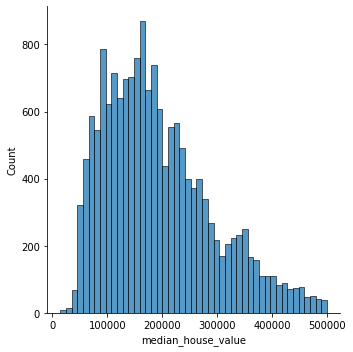

In [ ]:
sns.displot(df_data.query('median_house_value<500000'), x='median_house_value')

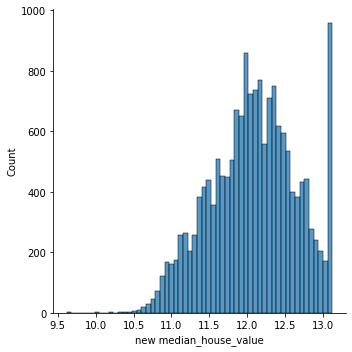

In [ ]:
sns.displot(data=df_data, x='new median_house_value')

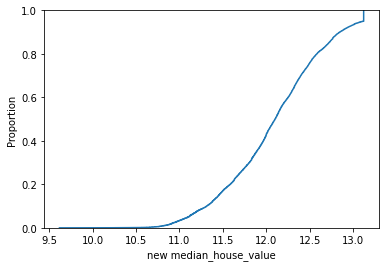

In [ ]:
sns.ecdfplot(data=df_data, x='new median_house_value')

# 迴歸

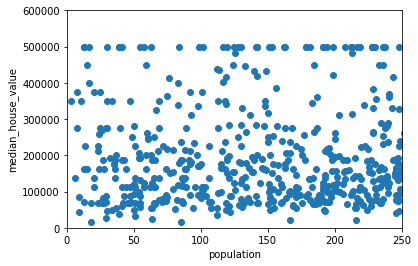

In [ ]:
X = df_data['population']
Y = df_data['median_house_value']

plt.scatter(X,Y)
plt.axis([0, 250, 0, 600000])
# 覺得太擠 想改變
plt.xlabel('population')
plt.ylabel('median_house_value')
plt.show()

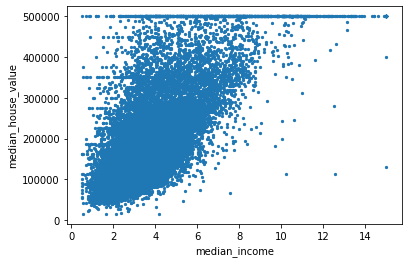

In [ ]:
X = df_data['median_income']
Y = df_data['median_house_value']

plt.scatter(X,Y, s=5)
# plt.axis([0, 2500, 0, 1500000])
# 覺得太擠 想改變
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

In [ ]:
df_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982,-0.022109
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917,-0.193543
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758,0.076881
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991,0.151707
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783,0.075469
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850,0.011404
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031,0.094708
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871,0.662194
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000,0.948356
new median_house_value,-0.022109,-0.193543,0.076881,0.151707,0.075469,0.011404,0.094708,0.662194,0.948356,1.000000


In [ ]:
# X = df_data[['housing_median_age','total_bedrooms','population','median_income','total_rooms','households']]
X = df_data[['housing_median_age','total_bedrooms','population','median_income','total_rooms','longitude','latitude']]
# X = df_data[['housing_median_age', 'households', 'population','median_income']]
# median_income佔很高ㄟ

In [ ]:
X1 = sm.add_constant(X)

In [ ]:
model_reg = sm.OLS(Y, X1).fit()

In [ ]:
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     4329.
Date:                Tue, 06 Apr 2021   Prob (F-statistic):               0.00
Time:                        07:09:38   Log-Likelihood:            -2.1366e+05
No. Observations:               17000   AIC:                         4.273e+05
Df Residuals:                   16992   BIC:                         4.274e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.695e+06   6.79

# 丟

In [ ]:
data = df_data[df_data['median_house_value']<500000]

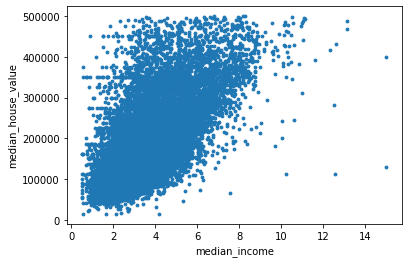

In [ ]:
X = data['median_income']
Y = data['median_house_value']

plt.scatter(X,Y, s=8)
# plt.axis([0, 250, 1, 600000])
# 覺得太擠 想改變
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

In [ ]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new median_house_value
longitude,1.000000,-0.924693,-0.107185,0.046968,0.072111,0.103056,0.060065,-0.005358,-0.043648,-0.016708
latitude,-0.924693,1.000000,0.010804,-0.036461,-0.070598,-0.116202,-0.076881,-0.081626,-0.151020,-0.197521
housing_median_age,-0.107185,0.010804,1.000000,-0.371852,-0.326612,-0.294645,-0.308516,-0.193215,0.065586,0.042558
total_rooms,0.046968,-0.036461,-0.371852,1.000000,0.932196,0.862741,0.921752,0.221801,0.143961,0.157706
total_bedrooms,0.072111,-0.070598,-0.326612,0.932196,1.000000,0.882109,0.980505,0.017216,0.074138,0.095510
population,0.103056,-0.116202,-0.294645,0.862741,0.882109,1.000000,0.910338,0.036415,0.011892,0.042656
households,0.060065,-0.076881,-0.308516,0.921752,0.980505,0.910338,1.000000,0.041564,0.093432,0.117234
median_income,-0.005358,-0.081626,-0.193215,0.221801,0.017216,0.036415,0.041564,1.000000,0.650355,0.644879
median_house_value,-0.043648,-0.151020,0.065586,0.143961,0.074138,0.011892,0.093432,0.650355,1.000000,0.953958
new median_house_value,-0.016708,-0.197521,0.042558,0.157706,0.095510,0.042656,0.117234,0.644879,0.953958,1.000000


In [ ]:
X = data[['longitude','latitude','housing_median_age','total_bedrooms','population','median_income','total_rooms','households']]

In [ ]:
X1 = sm.add_constant(X)

In [ ]:
model_reg = sm.OLS(Y, X1).fit()

In [ ]:
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     3136.
Date:                Tue, 06 Apr 2021   Prob (F-statistic):               0.00
Time:                        07:09:38   Log-Likelihood:            -2.0103e+05
No. Observations:               16164   AIC:                         4.021e+05
Df Residuals:                   16155   BIC:                         4.021e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.367e+06   6.21

In [ ]:
# 訓練及


# np log  訓練測試

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_data = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
# df_data = np.log(np.abs(df_data))

In [ ]:
train_X1 = df_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms','population','households','median_income']]

In [ ]:
train_Y = df_data['median_house_value']

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(train_X1)
scaled_X = scaler.transform(train_X1)


In [ ]:
X1 = sm.add_constant(scaled_X)

In [ ]:
model_reg = sm.OLS(train_Y,X1).fit()
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3798.
Date:                Tue, 06 Apr 2021   Prob (F-statistic):               0.00
Time:                        07:19:05   Log-Likelihood:            -2.1365e+05
No. Observations:               17000   AIC:                         4.273e+05
Df Residuals:                   16991   BIC:                         4.274e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.073e+05    532.866    389.030      0.0

In [ ]:
df_test = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
# df_test = np.log(np.abs(df_test))

In [ ]:
test_X1 = df_test.loc[:,['longitude', 'latitude','housing_median_age', 'total_rooms', 'total_bedrooms','population','households','median_income']]
test_Y = df_test.median_house_value

In [ ]:
test_X1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375
...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708


In [ ]:
scaler = scaler.fit(test_X1)
scaled_text_x = scaler.transform(test_X1)
test_X1 = sm.add_constant(scaled_text_x)

In [ ]:
len(test_X1),len(test_Y)

(3000, 3000)

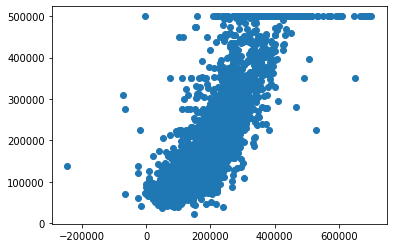

In [ ]:
plt.scatter(model_reg.predict(test_X1),test_Y)

In [ ]:
np.mean(np.abs(model_reg.predict(test_X1)-test_Y))

50669.44609099082

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
reg = LinearRegression().fit(X1, train_Y.values.reshape(-1,1))

In [ ]:
mean_absolute_error(test_Y, reg.predict(test_X1))
# 有變好? 比剛剛54425好嗎 

50669.44609099072

RFE

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe = RFE(LinearRegression(), n_features_to_select=4, step=1)

In [ ]:
rfe = rfe.fit(train_X1, train_Y.values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
rfe.get_support()

array([ True,  True,  True, False, False, False, False,  True])

In [ ]:
train_X1.columns[rfe.get_support()]

Index(['longitude', 'latitude', 'housing_median_age', 'median_income'], dtype='object')

In [ ]:
mean_absolute_error(train_Y, rfe.predict(train_X1))

54425.69165966792